Tutorial 4: Planes
==================

So far, we have learnt how to combine light profiles, mass profiles and galaxies to perform various calculations. In
this tutorial we'll use these objects to perform our first ray-tracing calculations!

A strong gravitational lens is a system where two (or more) galaxies align perfectly down our line of sight from Earth
such that the foreground galaxy's mass (represented as mass profiles) deflects the light (represented as light profiles)
of a background source galaxy(s).

When the alignment is just right and the lens is massive enough, the background source galaxy appears multiple
times. The schematic below shows such a system, where light-rays from the source are deflected around the lens galaxy
to the observer following multiple distinct paths.

![Schematic of Gravitational Lensing](https://i.imgur.com/zB6tIdI.jpg)

As an observer, we don't see the source's true appearance (e.g. a round blob of light). Instead, we only observe its 
light after it has been deflected and lensed by the foreground galaxys.

In the schematic above, we used the terms 'image-plane' and 'source-plane'. In lensing, a 'plane' is a collection of
galaxies at the same redshift (meaning that they are physically parallel to one another). In this tutorial, we'll
use the `Plane` object to create a strong lensing system like the one pictured above. Whilst a plane can contain
any number of galaxies, in this tutorial we'll stick to just one lens galaxy and one source galaxy.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


__Initial Setup__

As always, we need a 2D grid of $(y,x)$ coordinates. 

However, we can now think of our grid as the coordinates that we are going to 'trace' from the image-plane to the 
source-plane. We name our grid the `image_plane_grid` to reflect this.

In [2]:
image_plane_grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

We will also name our `Galaxy` objects `lens_galaxy` and `source_galaxy`, to reflect their role in the schematic above.

In [3]:
mass_profile = al.mp.SphIsothermal(centre=(0.0, 0.0), einstein_radius=1.6)

lens_galaxy = al.Galaxy(redshift=0.5, mass=mass_profile)

light_profile = al.lp.SphSersic(
    centre=(0.0, 0.0), intensity=1.0, effective_radius=1.0, sersic_index=1.0
)

source_galaxy = al.Galaxy(redshift=1.0, bulge=light_profile)

__Planes__

We now use the `Plane` object to create the image-plane of the schematic above, which uses the lens galaxy above. 
Because this galaxy is at redshift 0.5, this means our image-plane is also at redshift 0.5.

In [4]:
image_plane = al.Plane(galaxies=[lens_galaxy])

Just like profiles and galaxies, a `Plane` has `_from_grid` method which we can use to compute its quantities.

In [5]:
deflections = image_plane.deflections_2d_from_grid(grid=image_plane_grid)

print("deflection-angles of `Plane`'s `Grid2D` pixel 0:")
print(deflections.native[0, 0, 0])
print(deflections.native[0, 0, 0])

print("deflection-angles of `Plane`'s `Grid2D` pixel 1:")
print(deflections.native[0, 1, 1])
print(deflections.native[0, 1, 1])

deflection-angles of `Plane`'s `Grid2D` pixel 0:
1.1313708498984762
1.1313708498984762
deflection-angles of `Plane`'s `Grid2D` pixel 1:
-1.1197679539495438
-1.1197679539495438


There is also a `PlanePlotter` which, you guessed it, behaves like the profile and galaxy plotters.

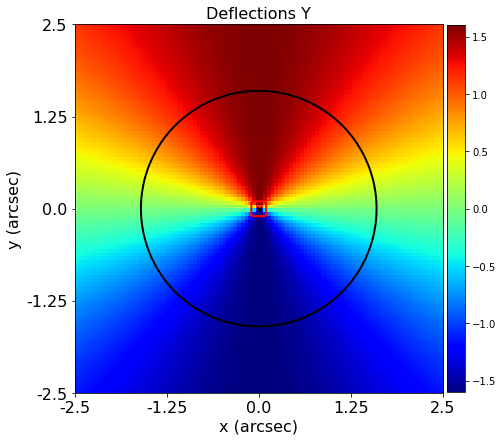

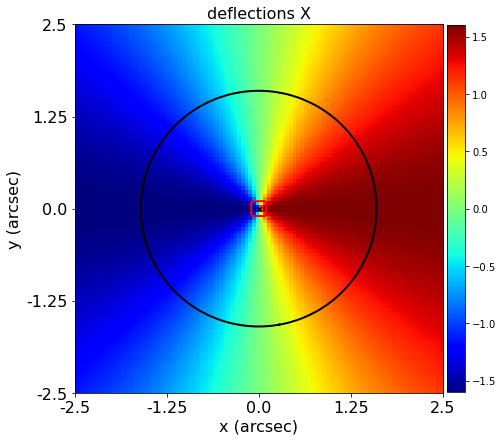

In [6]:
plane_plotter = aplt.PlanePlotter(plane=image_plane, grid=image_plane_grid)
plane_plotter.figures_2d(deflections_y=True, deflections_x=True)

__Ray Tracing__

Throughout this chapter we have plotted deflection angles frequently. However, we have not yet used the deflection 
angles to actually deflect anything! 

The deflection angles tell us how light is 'deflected' or 'lensed' by the lens galaxy. By taking the $(y,x)$ grid of 
image-plane coordinates and the $(y,x)$ grid of deflection angles, we can subtract the two to determine the 
source-plane`s coordinates, e.g.

 `source_plane_coordinates = image_plane_coordinates - image_plane_deflection_angles`

We perform this below using the `traced_grid_from_grid` method of the `image_plane`:

In [7]:
source_plane_grid = image_plane.traced_grid_from_grid(grid=image_plane_grid)

print("Traced source-plane coordinates of `Grid2D` pixel 0:")
print(source_plane_grid.native[0, 0, :])
print("Traced source-plane coordinates of `Grid2D` pixel 1:")
print(source_plane_grid.native[0, 1, :])

Traced source-plane coordinates of `Grid2D` pixel 0:
[ 1.34362915 -1.34362915]
Traced source-plane coordinates of `Grid2D` pixel 1:
[ 1.33214405 -1.30523205]


We now have grid of coordinates in the source-plane, so we can set up the source-plane as a `Plane` object.

In [8]:
source_plane = al.Plane(galaxies=[source_galaxy])

If its not yet clear what is going on, the figure below should explain below. Lets again plot our `image_plane_grid`,
which we know is a boring uniform grid of $(y,x)$ coordinates, but also plot the source-plane grid.

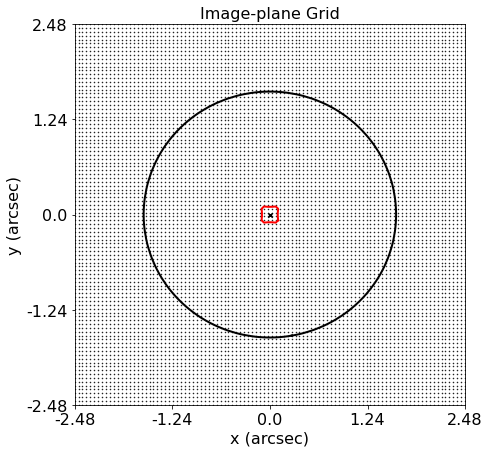

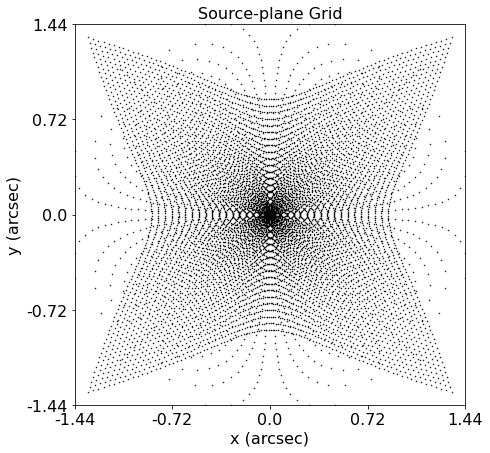

In [9]:
mat_plot_2d = aplt.MatPlot2D(title=aplt.Title(label="Image-plane Grid"))

plane_plotter = aplt.PlanePlotter(
    plane=image_plane, grid=image_plane_grid, mat_plot_2d=mat_plot_2d
)
plane_plotter.figures_2d(plane_grid=True)

mat_plot_2d = aplt.MatPlot2D(title=aplt.Title(label="Source-plane Grid"))

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, mat_plot_2d=mat_plot_2d
)
plane_plotter.figures_2d(plane_grid=True)

The source-plane looks very interesting! We can see it is not regular, not uniform, and has an aestetically pleasing
visual appearance. Remember that every coordinate on this source-plane grid (e.g. every black dot) corresponds to a 
coordinate on the image-plane grid that has been deflected by our mass profile; this is strong gravitational lensing
in action!

We can zoom in on the `centre` of the source-plane (remembering the lens galaxy was centred at (0.0", 0.0")) to 
reveal a 'diamond like' structure with a fractal like appearance.

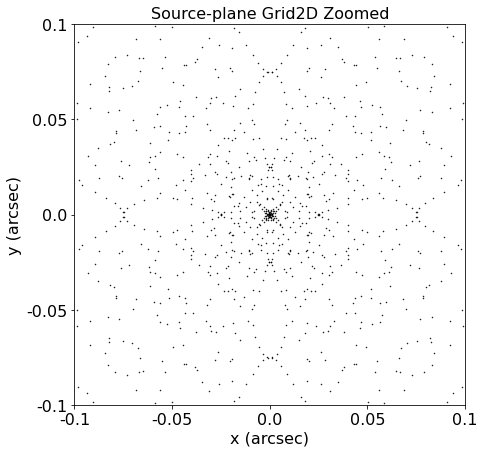

In [10]:
mat_plot_2d = aplt.MatPlot2D(
    title=aplt.Title(label="Source-plane Grid2D Zoomed"),
    axis=aplt.Axis(extent=[-0.1, 0.1, -0.1, 0.1]),
)

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, mat_plot_2d=mat_plot_2d
)

plane_plotter.figures_2d(plane_grid=True)

__Mappings__

Lets plot the image and source planes next to one another and highlight specific points on both. The coloring of the 
highlighted points therefore shows how specific image pixels **map** to the source-plane (and visa versa).

This is the first time we have used the `Visuals2D` object, which allows the appearance of **PyAutoLens** figures to 
be customized. We'll see this object crop up throughout the **HowToLens** lectures, and a full description of all
of its options is provided in the `autolens_workspace/plot` package.

Below, we input integer `indexes` that highlight the image-pixels that correspond to those indexes in 
a different color. We highlight indexes running from 0 -> 50, which appear over the top row of the image-plane grid,
alongside numerous other indexes.

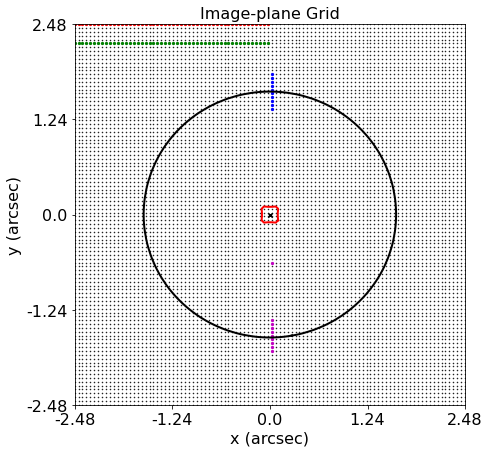

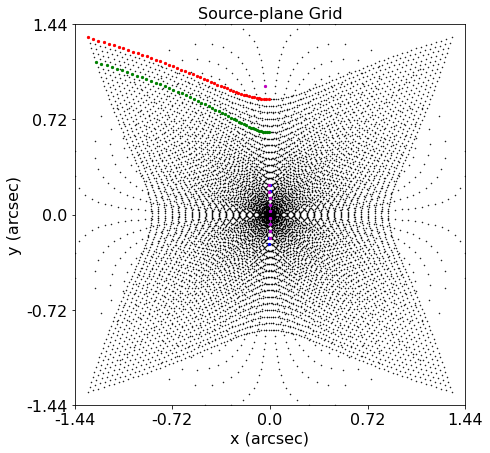

In [11]:
visuals_2d = aplt.Visuals2D(
    indexes=[
        range(0, 50),
        range(500, 550),
        [1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150, 2250],
        [6250, 8550, 8450, 8350, 8250, 8150, 8050, 7950, 7850, 7750],
    ]
)

mat_plot_2d = aplt.MatPlot2D(title=aplt.Title(label="Image-plane Grid"))

plane_plotter = aplt.PlanePlotter(
    plane=image_plane,
    grid=image_plane_grid,
    mat_plot_2d=mat_plot_2d,
    visuals_2d=visuals_2d,
)
plane_plotter.figures_2d(plane_grid=True)

mat_plot_2d = aplt.MatPlot2D(title=aplt.Title(label="Source-plane Grid"))

plane_plotter = aplt.PlanePlotter(
    plane=source_plane,
    grid=source_plane_grid,
    mat_plot_2d=mat_plot_2d,
    visuals_2d=visuals_2d,
)
plane_plotter.figures_2d(plane_grid=True)

__Lensed Images__

We can now map image-pixels to the source plane. Thus, we can ask the following question: what does a source-galaxy 
in the source-plane look like in the image-plane`? That is, to us, the observer  on Earth, how does the source-galaxy 
appear after its light has been deflected by the mass of the lens galaxy? What does it look like after strong 
gravitational lensing?. 

To do this, we simple trace the source galaxy's light back from the source-plane grid.

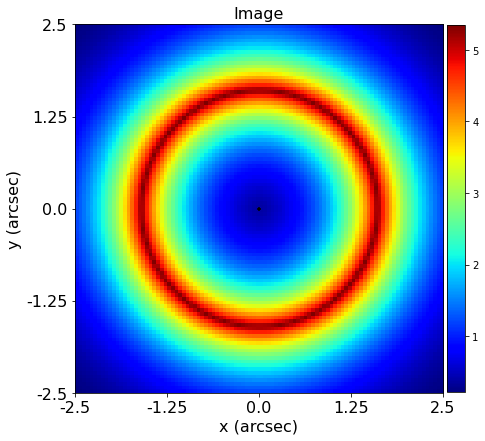

In [12]:
plane_plotter = aplt.PlanePlotter(plane=source_plane, grid=source_plane_grid)
plane_plotter.figures_2d(image=True)

It's a rather spectacular ring of light, but why is it a ring? Well:

- The lens galaxy is centred at (0.0", 0.0").
- The source-galaxy is centred at (0.0", 0.0").
- The lens galaxy is a spherical mass profile.
- The source-galaxy ia a spherical light profile.

Given the perfect symmetry of the system, every path the source's light takes around the lens galaxy is radially 
identical. Thus, nothing else but a ring of light can form!

This is called an 'Einstein Ring' and its radius is called the 'Einstein Radius', which are both named after the man 
who famously used gravitational lensing to prove his theory of general relativity.

Finally, we plot the `plane-image` of the source galaxy. This image represents how the source intrinsically appears 
in the source-plane (e.g. before it is strongly lensed). 

The source galaxy's light is highly magnified, meaning it appears brighter than otherwise possible. Many Astronomers
use strong lensing to study the most distant and faint galaxies in the Universe, which would otherwise be too faint for 
us to ever observe. Our ability to recover its light before the effects of lensing is therefore vital to studying the
source's properties.

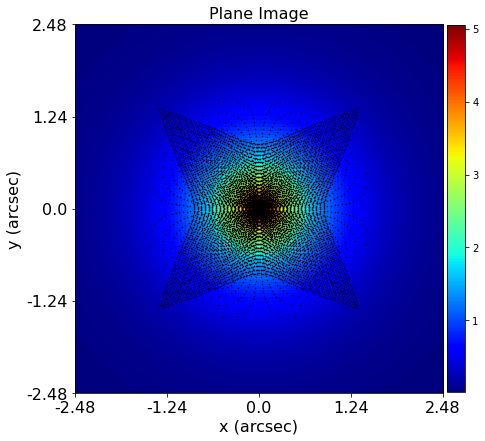

In [13]:
include_2d = aplt.Include2D(grid=True)

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, include_2d=include_2d
)
plane_plotter.figures_2d(plane_image=True)

We typically avoid plotting the soruce plane grid over a plane image because it obscures its appearance. We do this  
using the `Include2D` plotting object. 

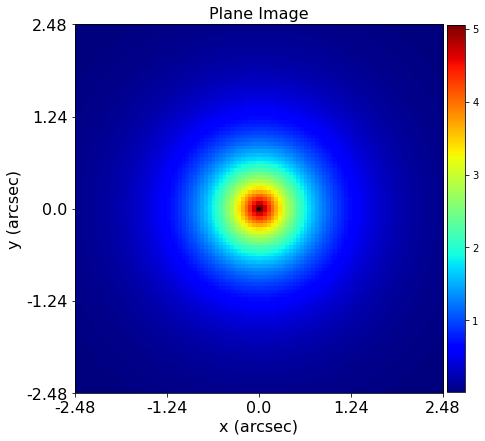

In [14]:
include_2d = aplt.Include2D(grid=False)

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, include_2d=include_2d
)
plane_plotter.figures_2d(plane_image=True)

__Critical Curves__

To end, we can finally explain what the black and red lines that have appeared on many of the plots throughout this
chapter actually are. 
 
These lines are called the 'critical curves', and they define line of infinite magnification due to a mass profile. 
They therefore mark where in the image-plane a mass profile perfectly `focuses` light rays such that if a source is 
located there, it will appear very bright: potentially 10-100x as brighter than its intrinsic luminosity.

In the next tutorial, we'll introduce 'caustics', which are where the critical curves map too in the source-plane.

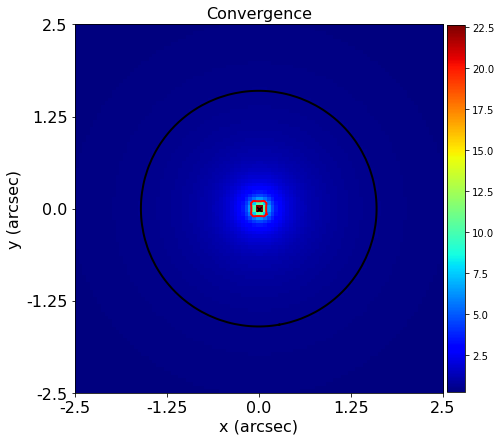

In [15]:
include_2d = aplt.Include2D(critical_curves=True)

plane_plotter = aplt.PlanePlotter(
    plane=image_plane, grid=image_plane_grid, include_2d=include_2d
)
plane_plotter.figures_2d(convergence=True)

You may be surprised that the inner critical curve does not appear symmetric, but instead is a non-circular jagged 
shape. This is a numerical issue with the way that **PyAutoLens** computes the critical curve. Without this issue
both critical curves would appear symmetric and smooth! Implementing a more robust calculation for these quantities is 
on the **PyAutoLens** feature list, but for now you'll just have to accept this aspect of the visualization is 
sub-optimal!

__Wrap Up__

And, we're done. This is the first tutorial where we performed actual strong-lensing calculations, so you take a 
moment to mess about with the code above and see how you can change the appearance of the source-plane grid and lensed
source's image.

In particular, you should try:

 1) Changing the lens galaxy's einstein radius, what happens to the source-plane`s image?

 2) Change the lens's mass profile from a `SphIsothermal` to an `EllIsothermal`, making sure to input 
 `elliptical_comps` that are not (0.0, 0.0). What happens to the number of source images?

Try to make an the image-plane with  two galaxies, both with mass profiles, and see how multi-galaxy lensing can 
produce extremely irregular images of a single source galaxy. Also try making a source-plane with multiple galaxies, 
and see how weird and irregular you can make the lensed image appear.

Finally, if you are a newcomer to strong lensing, now might be a good time to read-up briefly on some strong lensing 
theory. Don't worry about going over the maths of lensing in any detail, but you should at least try scouring 
Wikipedia or another source of information to clearly establish:

 - What a critical line is.
 - What a caustic is.
 - What determines the image multiplicity of the lensed source.